# Functions 

In [2]:
import random
import matplotlib.pyplot as plt
import numpy.random as npr
import numpy as np

def generate_random_string(length): # for part ii to generate a random string for the population
    return [random.randint(0, 1) for _ in range(length)]

def evaluate_fitness(string): 
    return sum(string) #fitness = #1's

def mutate(string): #flip a bit
    index = random.randint(0, len(string) - 1)
    mutated_string = string.copy()
    mutated_string[index] = 0 if mutated_string[index] else 1
    return mutated_string


# for crossover, use the 1st parents information from index 0--> n, 
# then get the 2nd parents information from index n --> 30 (size of string)
def single_point_crossover(parent1, parent2):
    index = random.randint(1, len(parent1) - 2)
    child = parent1[:index] + parent2[index:]
    return child


# function to select the best parent based on probabilities
def select_parent_roulette(population, fitness_values):
    maximum = sum(fitness_values)

    selection_probs = [x/maximum for x in fitness_values]

    return population[npr.choice(len(population), p=selection_probs)]

# function to only select the best parent
def select_best_parent(population, fitness_values):
    fitness_values = np.array(fitness_values)
    return population[fitness_values.argmax()]



# Part (A) (i) using single point crossover and parent selection by roulette wheel 

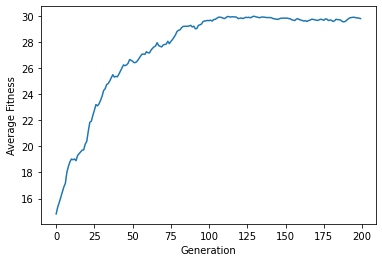

In [14]:
def genetic_algorithm(population_size, string_length, generations, mutation_rate):
    
    population = [generate_random_string(string_length) for _ in range(population_size)] #30 random bit strings generated
    fitness_values = [evaluate_fitness(string) for string in population] #array of fitness values
    
    average_fitness = [] #average fitness used for plotting score across generations
    for generation in range(generations):
        average_fitness.append(sum(fitness_values) / len(fitness_values))
        new_population = []
        
        while len(new_population) < population_size:
            parent1 = select_parent_roulette(population, fitness_values)
            parent2 = select_parent_roulette(population, fitness_values)
            child = single_point_crossover(parent1, parent2)
            if random.random() < mutation_rate:
                child = mutate(child)
            
            # after 2 parents randomly chosen and combined through crossover and maybe after mutation a new child is created
            new_population.append(child)
        
        population = new_population
        fitness_values = [evaluate_fitness(string) for string in population] #fitness values calculated for new generation
        
    return average_fitness

population_size = 100 
string_length = 30
generations = 200
mutation_rate = 0.01

average_fitness = genetic_algorithm(population_size, string_length, generations, mutation_rate)

plt.plot(average_fitness)
plt.xlabel("Generation")
plt.ylabel("Average Fitness")
plt.show()


# Part (A) (i) Only picking the best parent (only evolving through mutation)

Interesting to see how little variation is needed for the algorithm to reach an optimal solution in this case

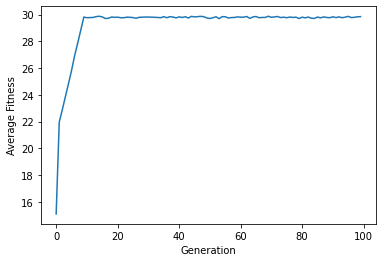

In [17]:
def genetic_algorithm(population_size, string_length, generations, mutation_rate):
    
    population = [generate_random_string(string_length) for _ in range(population_size)] #30 random bit strings generated
    fitness_values = [evaluate_fitness(string) for string in population] #array of fitness values
    
    average_fitness = [] #average fitness used for plotting score across generations
    for generation in range(generations):
        average_fitness.append(sum(fitness_values) / len(fitness_values))
        new_population = []
        while len(new_population) < population_size:
            
            child = select_best_parent(population, fitness_values) #children are all just the same parent from previous generation
            
            if random.random() < mutation_rate:
                child = mutate(child)
            
                
            new_population.append(child)
        
        population = new_population
        fitness_values = [evaluate_fitness(string) for string in population] #fitness values calculated for new generation
        
    return average_fitness

population_size = 100
string_length = 30
generations = 100
mutation_rate = 0.2

average_fitness = genetic_algorithm(population_size, string_length, generations, mutation_rate)

plt.plot(average_fitness)
plt.xlabel("Generation")
plt.ylabel("Average Fitness")
plt.show()

# Part (A) (ii) using roulette wheel parent selection and crossover

In [36]:
# NEW FITNESS FUNCTION

# Assuming target and string are strings of the same length:
def evaluate_fitness_ii(target, string):
    score=0
    for i in range(len(target)):        
        if target[i] == string[i]:
            score= score+1
            
    
    return score

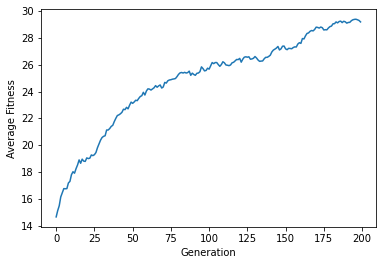

In [41]:
def genetic_algorithm_ii(population_size, string_length, generations, mutation_rate, target):
    
    population = [generate_random_string(string_length) for _ in range(population_size)] #30 random bit strings generated
    fitness_values = [evaluate_fitness(string) for string in population] #array of fitness values
    
    average_fitness = [] #average fitness used for plotting score across generations
    for generation in range(generations):
        average_fitness.append(sum(fitness_values) / len(fitness_values))
        new_population = []
        while len(new_population) < population_size:
            
            parent1 = select_parent_roulette(population, fitness_values)
            parent2 = select_parent_roulette(population, fitness_values)
            child = single_point_crossover(parent1, parent2)            
            
            if random.random() < mutation_rate:
                child = mutate(child)
            
                
            new_population.append(child)
        
        population = new_population
        fitness_values = [evaluate_fitness_ii(target, string) for string in population]
        
    return average_fitness

population_size = 100
string_length = 30
generations = 200
mutation_rate = 0.01

# Target randomly chosen:
target=generate_random_string(string_length)
average_fitness = genetic_algorithm_ii(population_size, string_length, generations, mutation_rate, target)

plt.plot(average_fitness)
plt.xlabel("Generation")
plt.ylabel("Average Fitness")
plt.show()

# Part (A) (ii) using only mutation from best parent (no crossover)

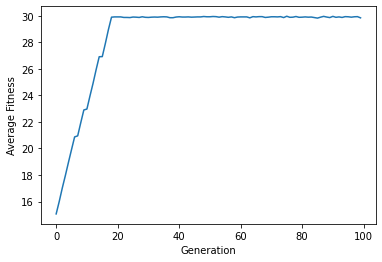

In [26]:
def genetic_algorithm_ii(population_size, string_length, generations, mutation_rate, target):
    
    population = [generate_random_string(string_length) for _ in range(population_size)] #30 random bit strings generated
    fitness_values = [evaluate_fitness(string) for string in population] #array of fitness values
    
    average_fitness = [] #average fitness used for plotting score across generations
    for generation in range(generations):
        average_fitness.append(sum(fitness_values) / len(fitness_values))
        new_population = []
        while len(new_population) < population_size:
            
            child = select_best_parent(population, fitness_values) #best parent chosen every time            
            
            if random.random() < mutation_rate:
                child = mutate(child)
            
                
            new_population.append(child)
        
        population = new_population
        fitness_values = [evaluate_fitness_ii(target, string) for string in population]
        
    return average_fitness

population_size = 100
string_length = 30
generations = 100
mutation_rate = 0.1

# Target randomly chosen:
target=generate_random_string(string_length)
average_fitness = genetic_algorithm_ii(population_size, string_length, generations, mutation_rate, target)

plt.plot(average_fitness)
plt.xlabel("Generation")
plt.ylabel("Average Fitness")
plt.show()

# Part A (iii) Deceptive landscape

In [29]:
# New fitness function

def evaluate_fitness_iii(string): 
    score = sum(string)
    if score == 0:
        return len(string)*2
    else:
        return sum(string) #fitness = #1's

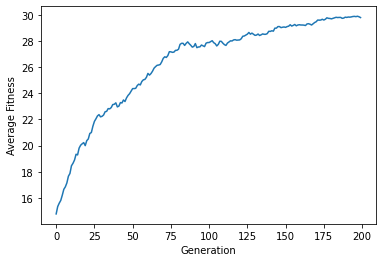

In [31]:
def genetic_algorithm(population_size, string_length, generations, mutation_rate):
    
    population = [generate_random_string(string_length) for _ in range(population_size)] #30 random bit strings generated
    fitness_values = [evaluate_fitness_iii(string) for string in population] #array of fitness values
    
    average_fitness = [] #average fitness used for plotting score across generations
    for generation in range(generations):
        average_fitness.append(sum(fitness_values) / len(fitness_values))
        new_population = []
        
        while len(new_population) < population_size:
            parent1 = select_parent_roulette(population, fitness_values)
            parent2 = select_parent_roulette(population, fitness_values)
            child = single_point_crossover(parent1, parent2)
            if random.random() < mutation_rate:
                child = mutate(child)
            
            # after 2 parents randomly chosen and combined through crossover and maybe after mutation a new child is created
            new_population.append(child)
        
        population = new_population
        fitness_values = [evaluate_fitness_iii(string) for string in population] #fitness values calculated for new generation
        
    return average_fitness

population_size = 100 
string_length = 30
generations = 200
mutation_rate = 0.01

average_fitness = genetic_algorithm(population_size, string_length, generations, mutation_rate)

plt.plot(average_fitness)
plt.xlabel("Generation")
plt.ylabel("Average Fitness")
plt.show()


# Part A (iv)

Updating some functions:

In [32]:
# NEW FITNESS FUNCTION

# Assuming target and string are strings of the same length:
def evaluate_fitness_iv(target, string):
    score=0
    for i in range(len(target)):        
        if target[i] == string[i]:
            score= score+1
            
    
    return score

def generate_random_string_iv(length):
    return [random.randint(0, 9) for _ in range(length)]

def mutate_iv(string): # mutate an element in the string to another random number
    mutated_string = string.copy()    
    index = random.randint(0, len(string) - 1)    
    mutated_string[index] = random.randint(0, 9)
    return mutated_string

def random_crossover(parent1, parent2, length): #randomly mix 2 parents
    sieve=np.random.randint(2, size=(1,length))[0]
    not_sieve=sieve^1
    child = parent1*sieve + parent2*not_sieve
    return child



# The genetic algorithm

This method is probably too convoluted then necessary but it's what worked for me to get an optimal score:

-- 1. For the first 100 generations evolve as normal, 2 parents selected by the roulette wheel and child is created with random  crossover and maybe mutation. This usually reaches a score of 25/30

-- 2. Then for 30 generations, one out of the 2 parents picked is always the highest scorer from the population. This reduces variation in the population but helps hone in on a better score. 

-- 3. On average steps 1 and 2 will result in a score of around 28/30. However sometimes it reaches a score of 30. To consistently get a score of 30, I create 20 islands that evolve seperately and the highest scoring island is picked.

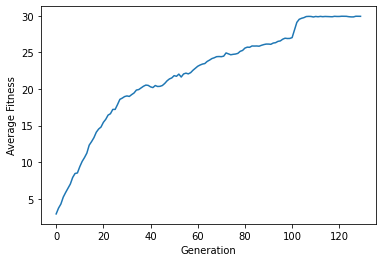

In [35]:
def genetic_algorithm_iv(population_size, string_length, generations, mutation_rate, target):
    population = [generate_random_string_iv(string_length) for _ in range(population_size)]
    fitness_values = [evaluate_fitness_iv(target, string) for string in population]
    
    average_fitness = []
    for generation in range(generations):
        average_fitness.append(sum(fitness_values) / len(fitness_values))
        new_population = []
        while len(new_population) < population_size:
            
            if generation <100:           
                parent1 = select_parent_roulette(population, fitness_values)
                parent2 = select_parent_roulette(population, fitness_values)
            else:
                
                parent1 = select_best_parent(population, fitness_values)
                parent2 = select_parent_roulette(population, fitness_values)
                
            child = random_crossover(parent1, parent2, string_length)
            if random.random() < mutation_rate:
                child = mutate(child)
            
                
            new_population.append(child)
        
        population = new_population
        fitness_values = [evaluate_fitness_iv(target, string) for string in population]
        
    return average_fitness

population_size = 100
string_length = 30
generations = 130
mutation_rate = 0.05



# Target randomly chosen:
target=generate_random_string_iv(string_length)

score = 0
best_fitness= []
for i in range(20):
    average_fitness = genetic_algorithm_iv(population_size, string_length, generations, mutation_rate, target)
    fit = max(average_fitness)
    if fit >= score:
        score = fit
        best_fitness = average_fitness
    
plt.plot(best_fitness)
plt.xlabel("Generation")
plt.ylabel("Average Fitness")
plt.show()

^^ Notice the spike in fitness after switching the parent selection method after 100 generations